### 텍스트 생성

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

import urllib

In [2]:
# Colab용 
# !wget --no-check-certificate \
#     https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
#     -O /tmp/irish-lyrics-eof.txt

In [3]:
# irish-lyrics-eof.txt 데이터셋 파일 다운로드 
url = 'https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt'
urllib.request.urlretrieve(url, 'irish-lyrics-eof.txt')

('irish-lyrics-eof.txt', <http.client.HTTPMessage at 0x1c2ed649a00>)

In [4]:
# 데이터 불러오기
data = open('irish-lyrics-eof.txt').read()
# print(data)

corpus = data.lower().split('\n')
# corpus

# 토큰화
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)  # 정수 인덱스
total_words = len(tokenizer.word_index) + 1  
print(total_words)           # 2690
print(tokenizer.word_index)

2690
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 

In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    for i in range(1,len(token_list)):  # 1,2,3,4,5,6
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    
# 패딩
max_sequence_len = max([len(x) for x in input_sequences])  # 16
input_sequences = pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre')
# input_sequences

# X,Y(label)
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

# 원핫인코딩
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)

print(xs)
print(xs.shape)   # (12038, 15)
print(labels)
print(ys.shape)   # (12038, 2690)
print(ys)

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0   0  47]
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]]
(12038, 15)
[  12   96 1217 ...  105  138  184]
(12038, 2690)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [7]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [8]:
# 모델 구현
model = Sequential() 
model.add(Embedding(total_words,100,input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation='softmax'))

model.compile(optimizer = Adam(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 학습 : 약 3~4 분소요(GPU)
history = model.fit(xs,ys,epochs=100)

Epoch 1/100
377/377 [==============================] - 4s 5ms/step - loss: 6.6603 - accuracy: 0.0706
Epoch 2/100
377/377 [==============================] - 2s 5ms/step - loss: 5.8146 - accuracy: 0.1092
Epoch 3/100
377/377 [==============================] - 2s 5ms/step - loss: 5.0029 - accuracy: 0.1570
Epoch 4/100
377/377 [==============================] - 2s 5ms/step - loss: 4.0958 - accuracy: 0.2231
Epoch 5/100
377/377 [==============================] - 2s 5ms/step - loss: 3.2648 - accuracy: 0.3182
Epoch 6/100
377/377 [==============================] - 2s 5ms/step - loss: 2.5896 - accuracy: 0.4194
Epoch 7/100
377/377 [==============================] - 2s 5ms/step - loss: 2.0879 - accuracy: 0.5151
Epoch 8/100
377/377 [==============================] - 2s 5ms/step - loss: 1.7035 - accuracy: 0.5994
Epoch 9/100
377/377 [==============================] - 2s 5ms/step - loss: 1.4465 - accuracy: 0.6507
Epoch 10/100
377/377 [==============================] - 2s 5ms/step - loss: 1.2595 - accura

377/377 [==============================] - 2s 5ms/step - loss: 0.8961 - accuracy: 0.7644
Epoch 82/100
377/377 [==============================] - 2s 5ms/step - loss: 0.8764 - accuracy: 0.7669
Epoch 83/100
377/377 [==============================] - 2s 5ms/step - loss: 0.9123 - accuracy: 0.7624
Epoch 84/100
377/377 [==============================] - 2s 5ms/step - loss: 0.9066 - accuracy: 0.7622
Epoch 85/100
377/377 [==============================] - 2s 5ms/step - loss: 0.8736 - accuracy: 0.7748
Epoch 86/100
377/377 [==============================] - 2s 5ms/step - loss: 0.8225 - accuracy: 0.7837
Epoch 87/100
377/377 [==============================] - 2s 5ms/step - loss: 0.8161 - accuracy: 0.7849
Epoch 88/100
377/377 [==============================] - 2s 5ms/step - loss: 0.7947 - accuracy: 0.7922
Epoch 89/100
377/377 [==============================] - 2s 5ms/step - loss: 0.8072 - accuracy: 0.7901
Epoch 90/100
377/377 [==============================] - 2s 5ms/step - loss: 0.8674 - accuracy: 

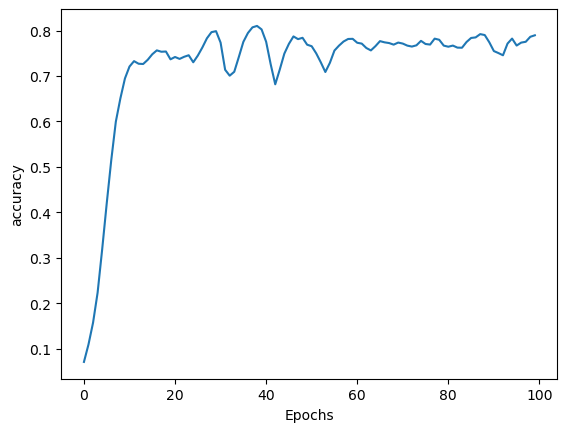

In [10]:
# 시각화
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [25]:
# 텍스트(문장) 생성
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0] # 인코딩
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
    # predicted = model.predict_classes(token_list) # tf 2.7에서 오류
    predicted = model.predict(token_list,verbose=0)
    predicted = tf.argmax(predicted,-1)
    output_word = ''
    
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += ' ' + output_word
#     print(token_list)
#     print(predicted)
#     print(output_word)
#     print(seed_text)
#     input()

print(seed_text)

I've got a bad feeling about this proud old woman did say shall my true love art gone the gone the room in now youve gone to the gone the rocky eyes tree easy to gone the rocky laughter now along the sea is gone and the covers buttoned down to gone it in numbers odd and even him straight eyes gone as they steal more high rocky slopes round the cliffs of doneen your grief will be no more love now in your eyes you thorn gone away now your eyes glisten lies there lies gone now the room in erin go bragh gone to the
